⚠️ 检测到交互式环境，使用当前工作目录: D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters
📂 正在读取数据: D:\App\Pycharm\1120MovieSchedulingSimulation\logs\black_horse\black_horse_evaluation_results.csv
✅ 成功加载 132 条记录。
📂 图片将保存至: D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\black_horse_style

🚀 开始绘制高级感图表，共 33 个案例...
🎨 绘图: 《流浪地球》


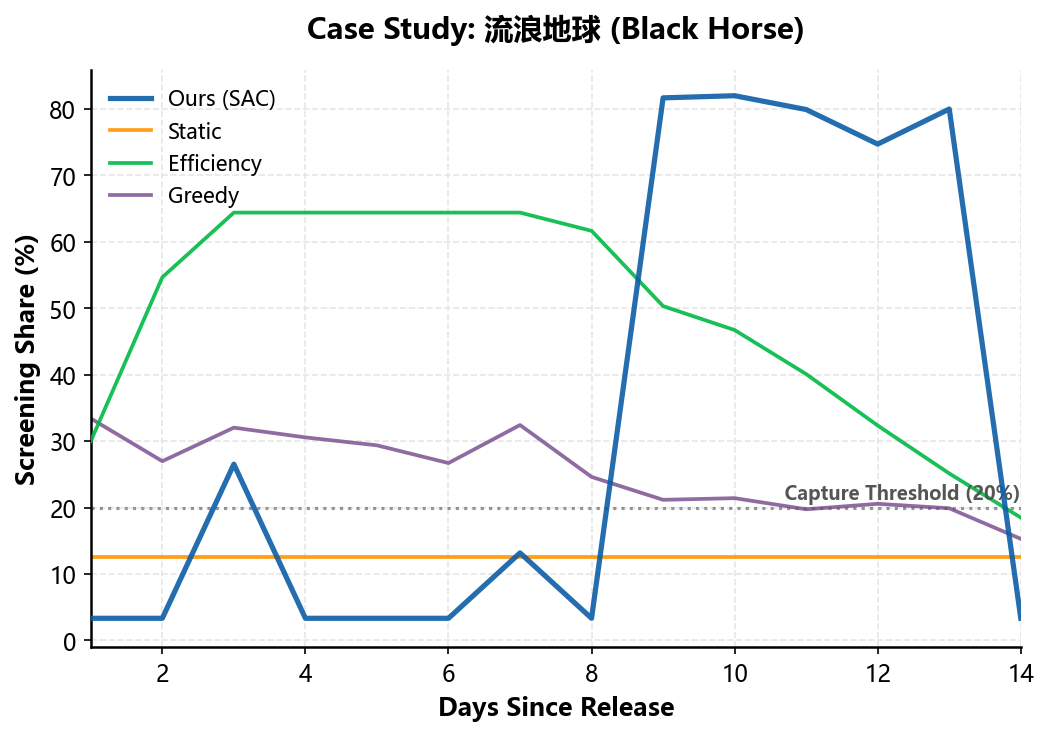

🎨 绘图: 《比悲伤更悲伤的故事》


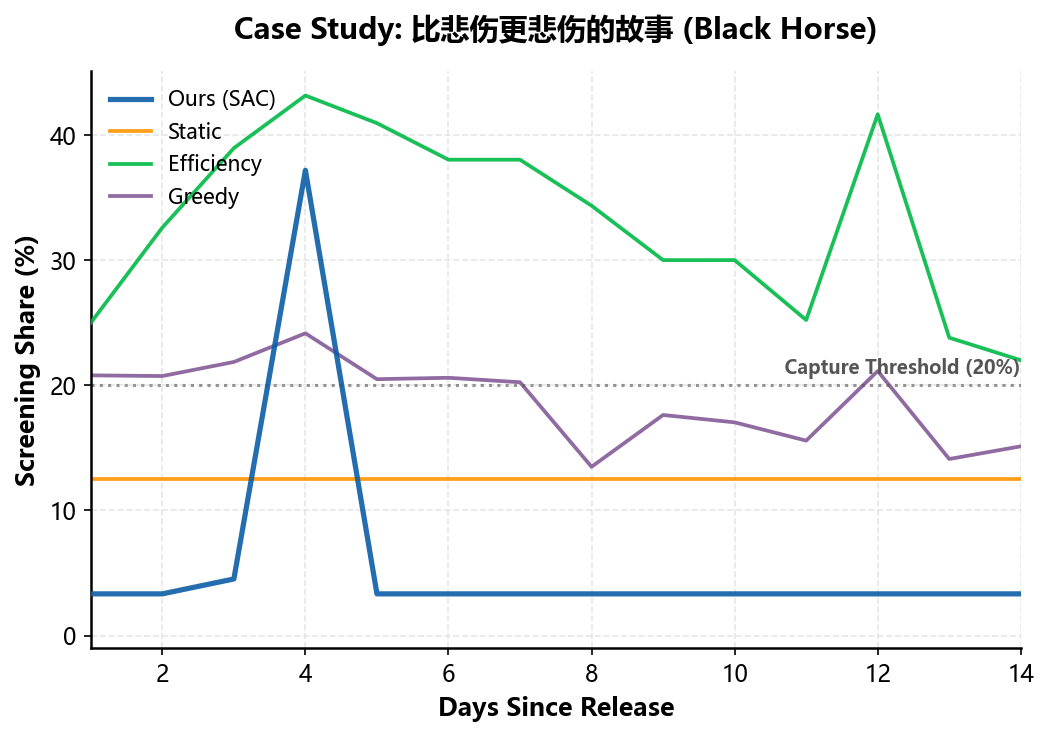

🎨 绘图: 《刺杀小说家》


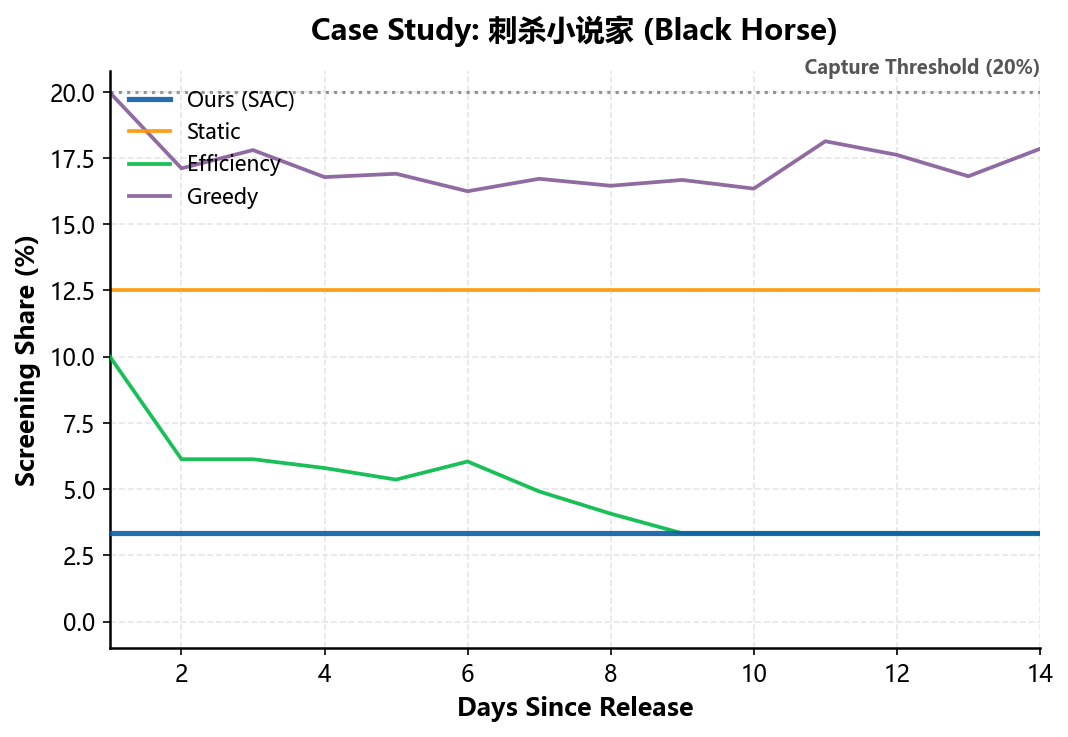

🎨 绘图: 《人潮汹涌》


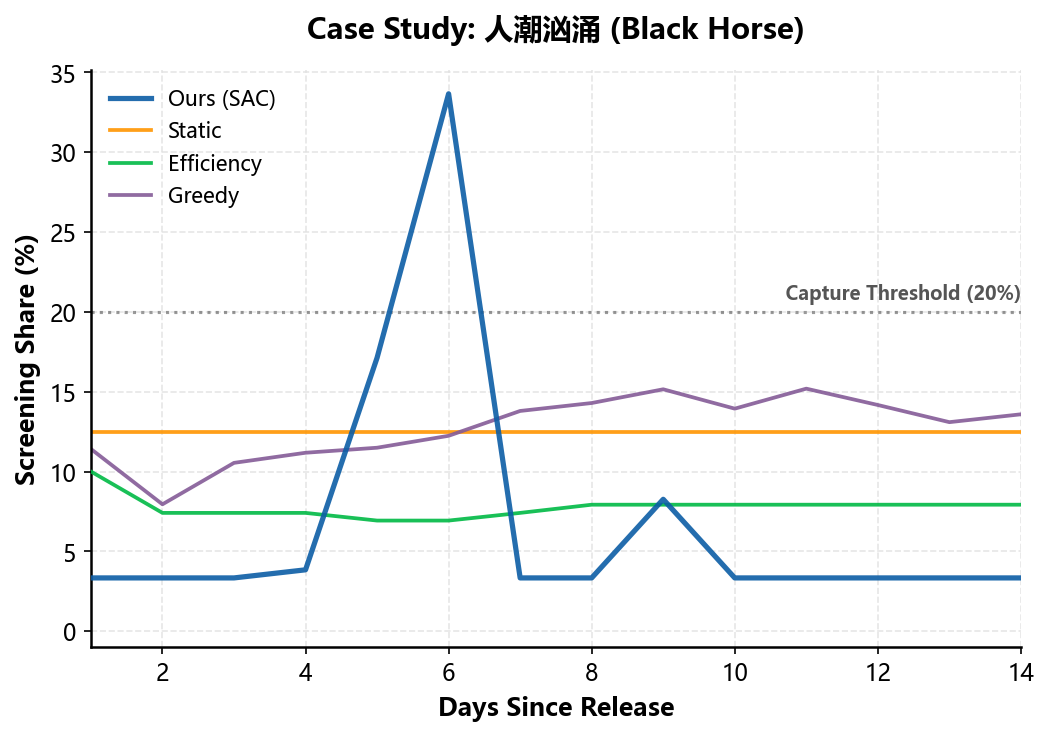

🎨 绘图: 《熊出没·狂野大陆》


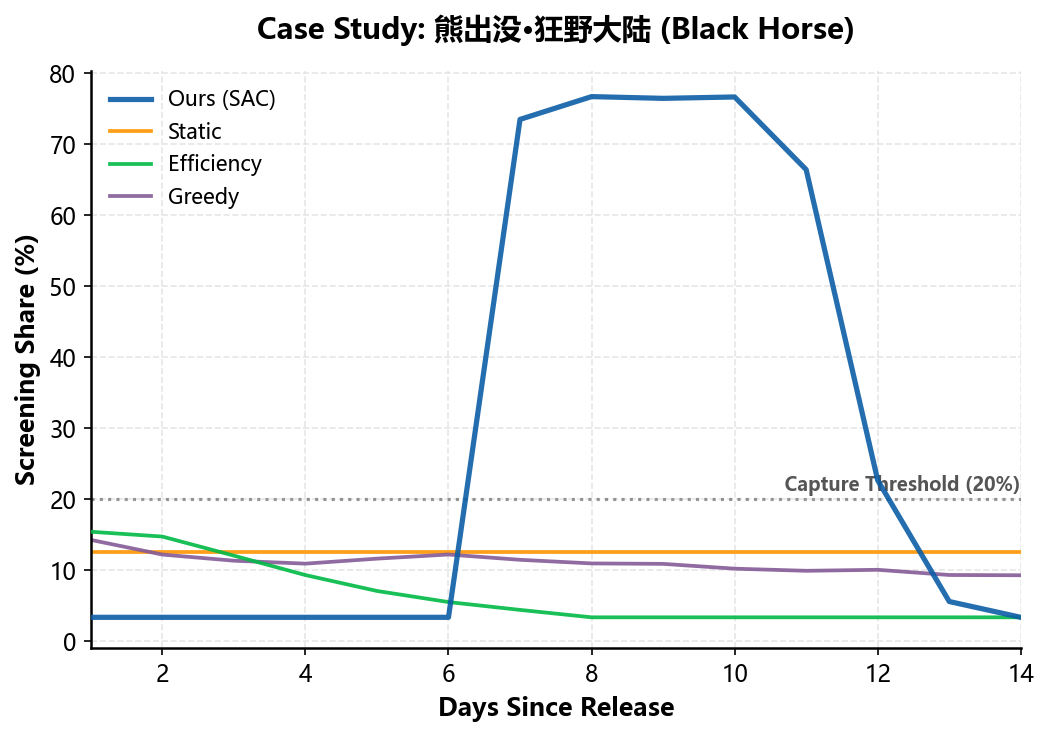

🎨 绘图: 《我的姐姐》


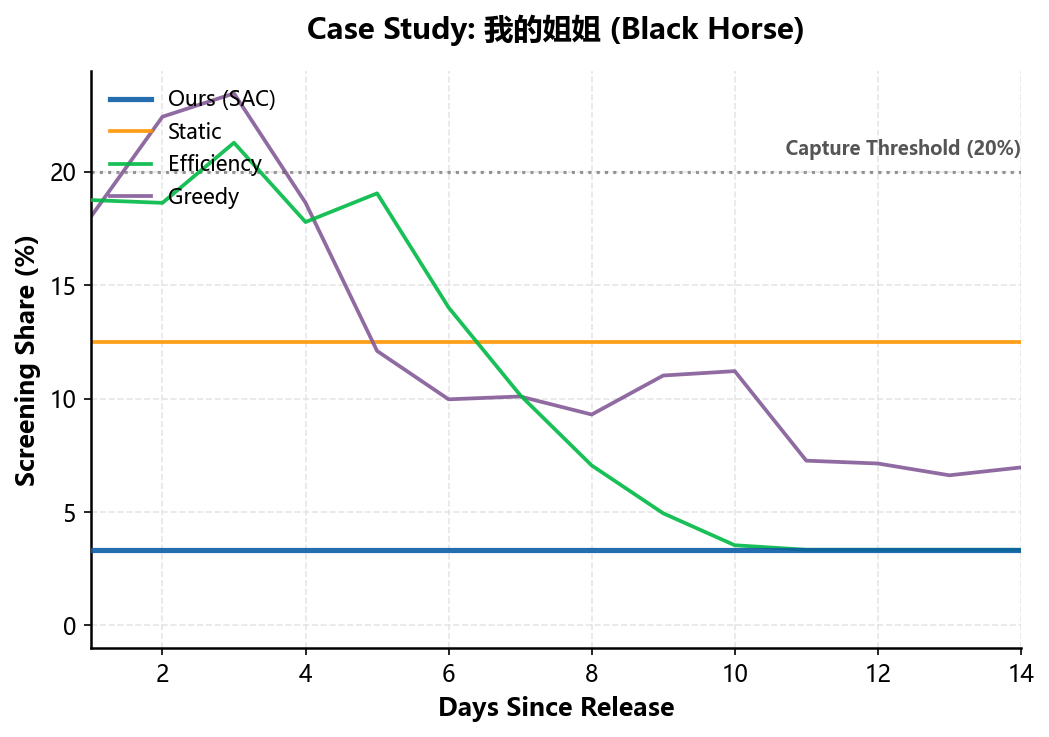

🎨 绘图: 《悬崖之上》


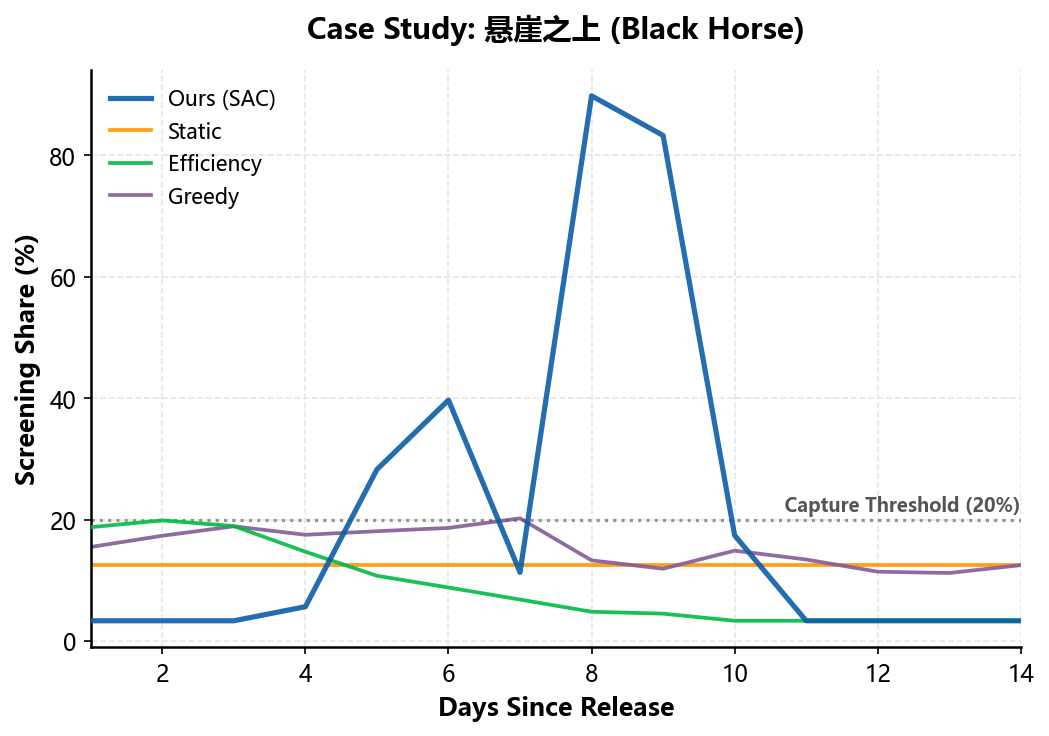

🎨 绘图: 《我和我的父辈》


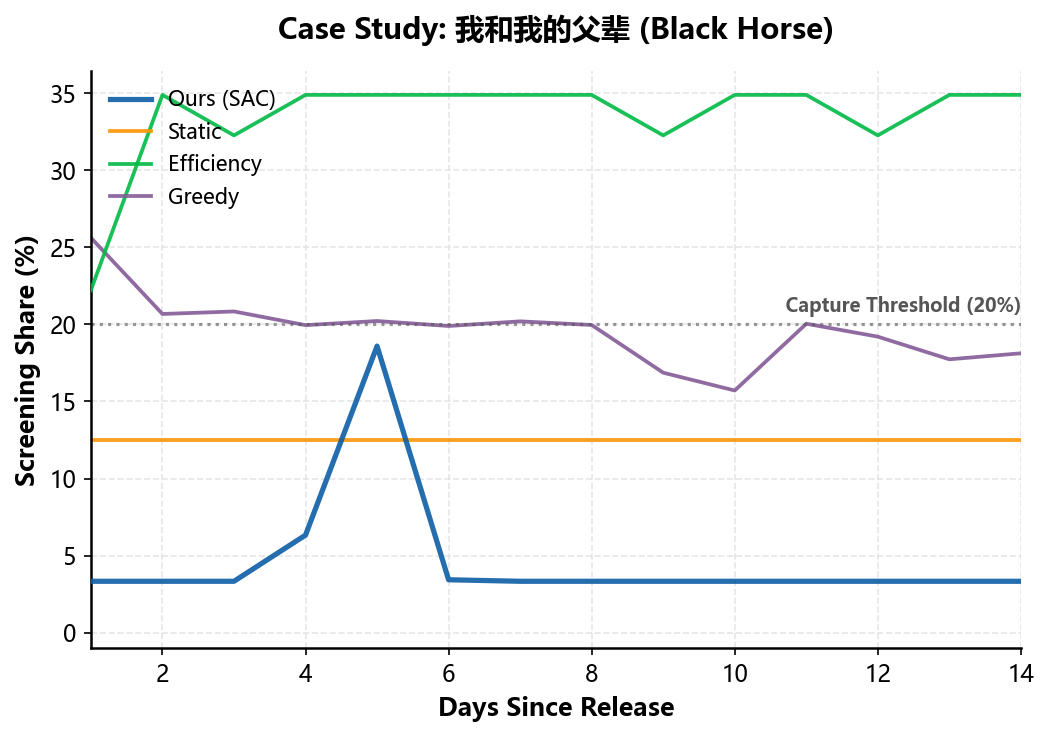

🎨 绘图: 《扬名立万》


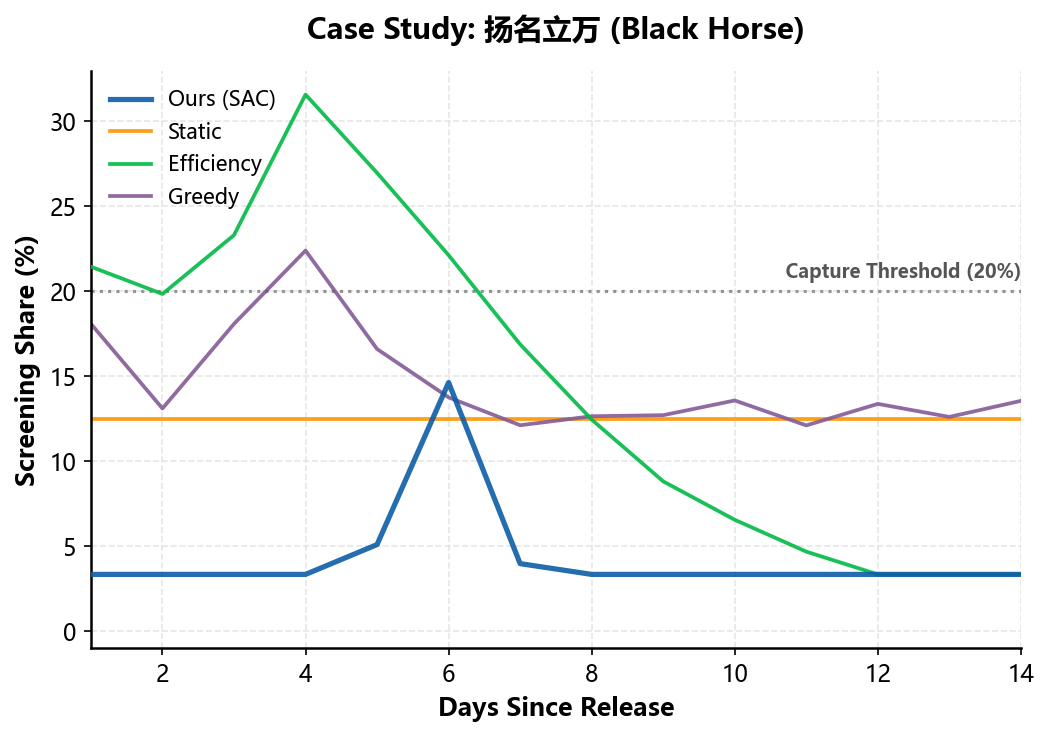

🎨 绘图: 《这个杀手不太冷静》


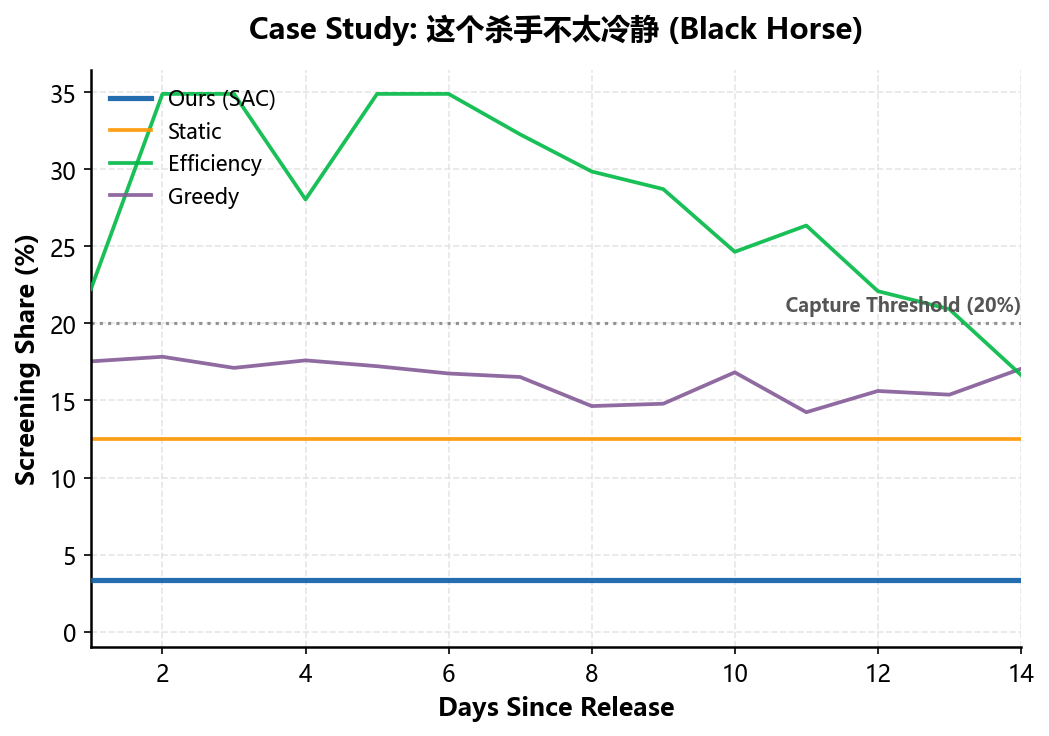

🎨 绘图: 《熊出没·重返地球》


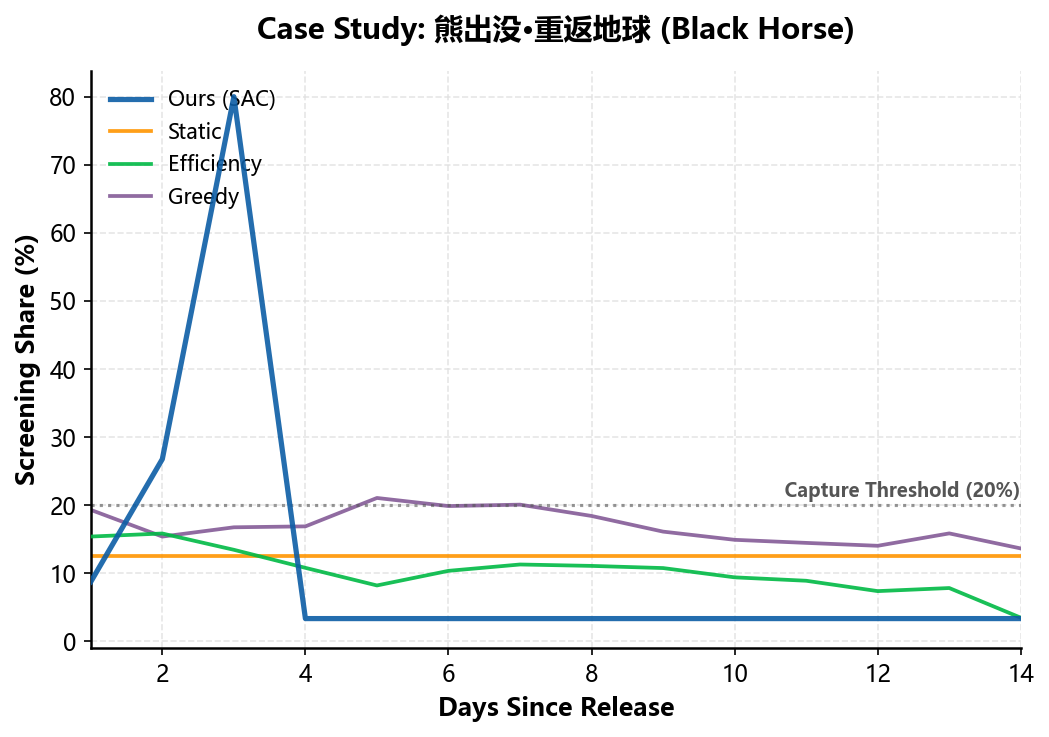

🎨 绘图: 《狙击手》


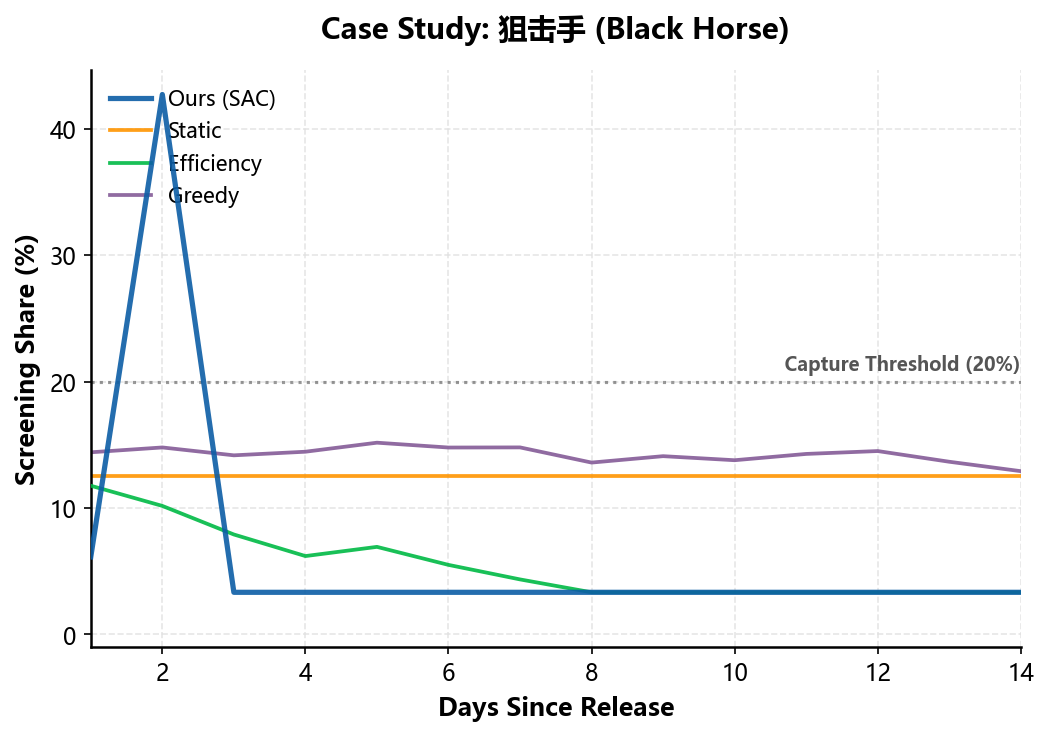

🎨 绘图: 《四海》


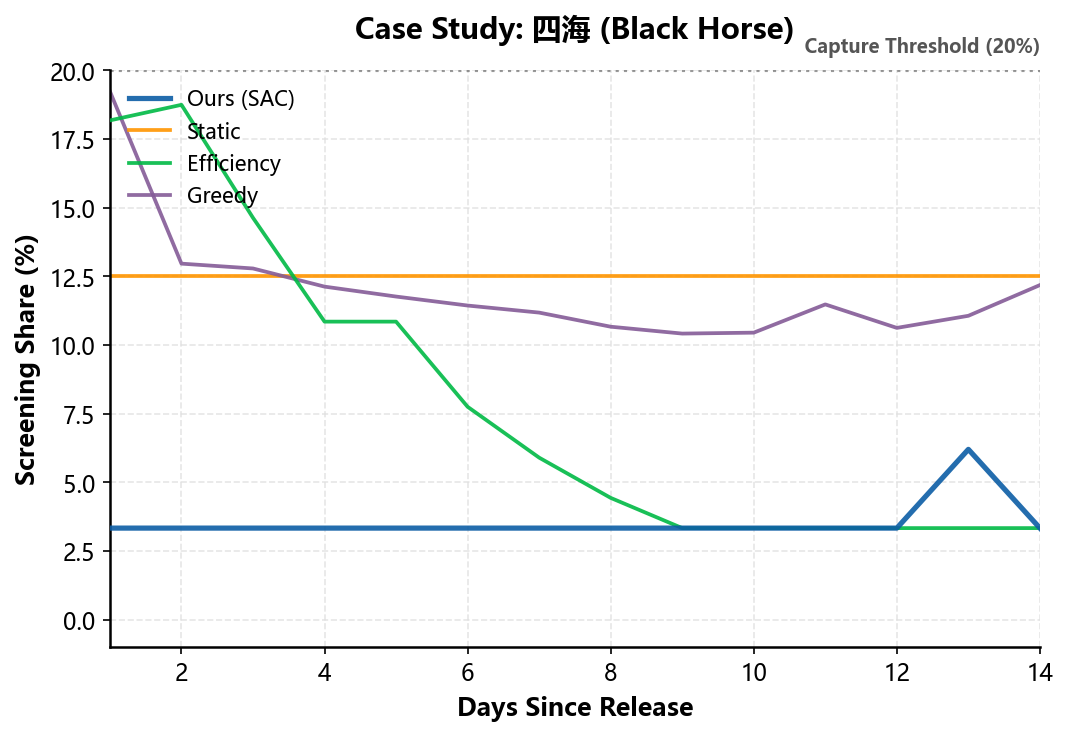

🎨 绘图: 《熊出没·伴我“熊芯”》


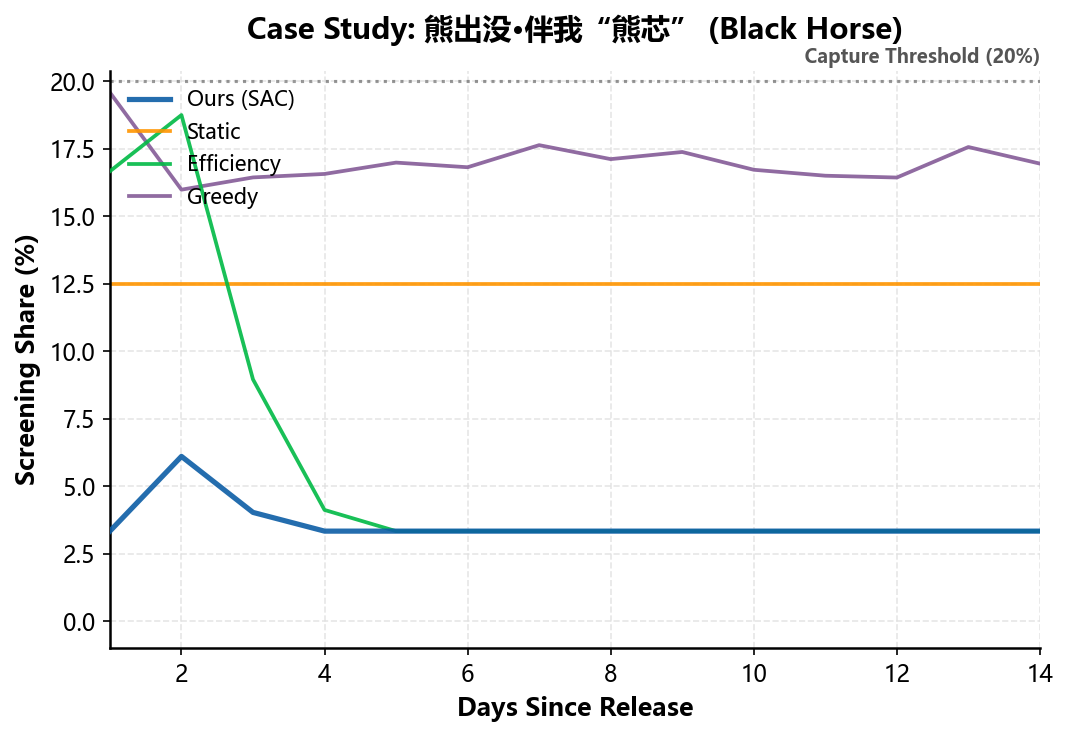

🎨 绘图: 《无名》


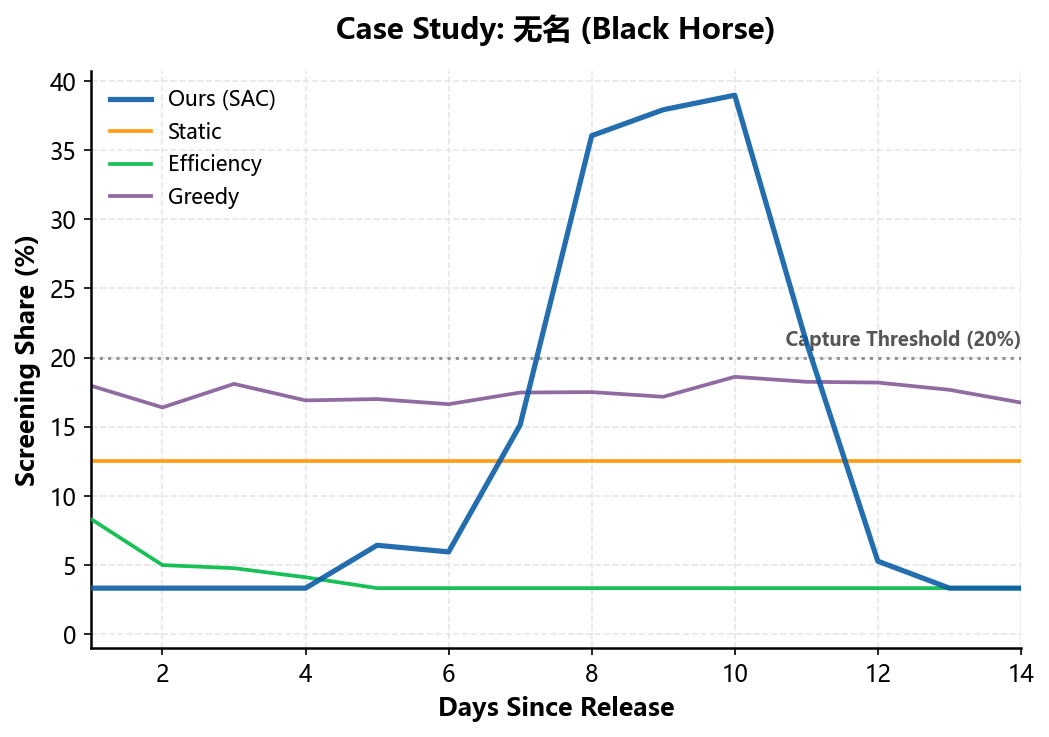

🎨 绘图: 《深海》


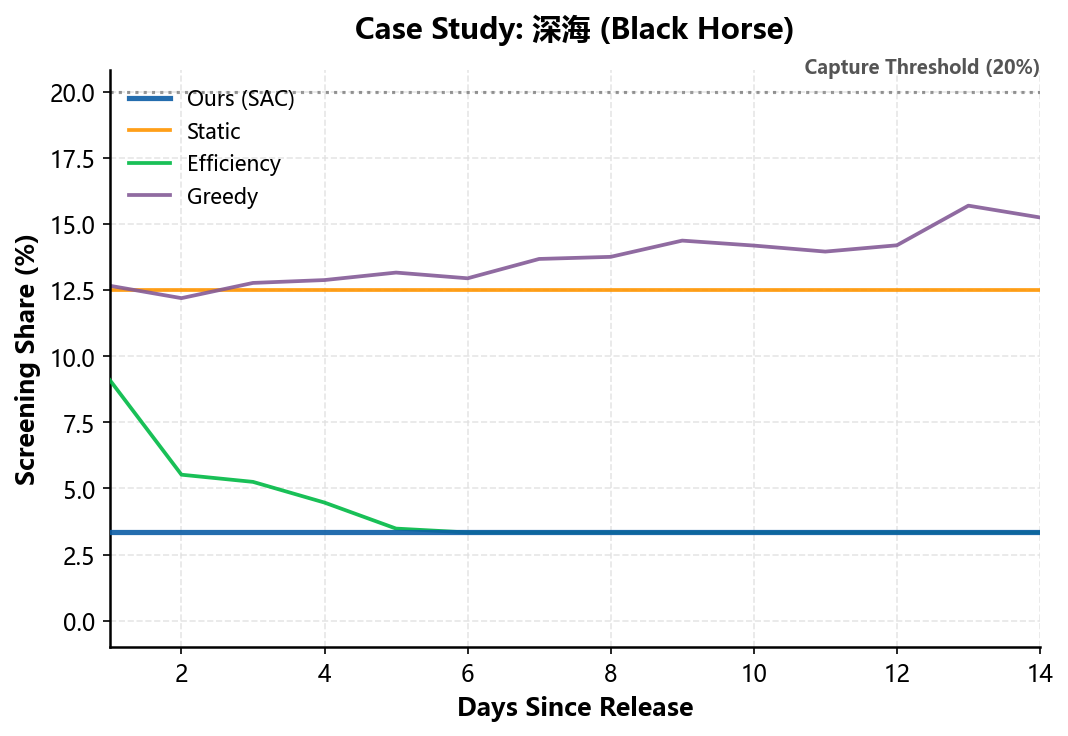

🎨 绘图: 《人生路不熟》


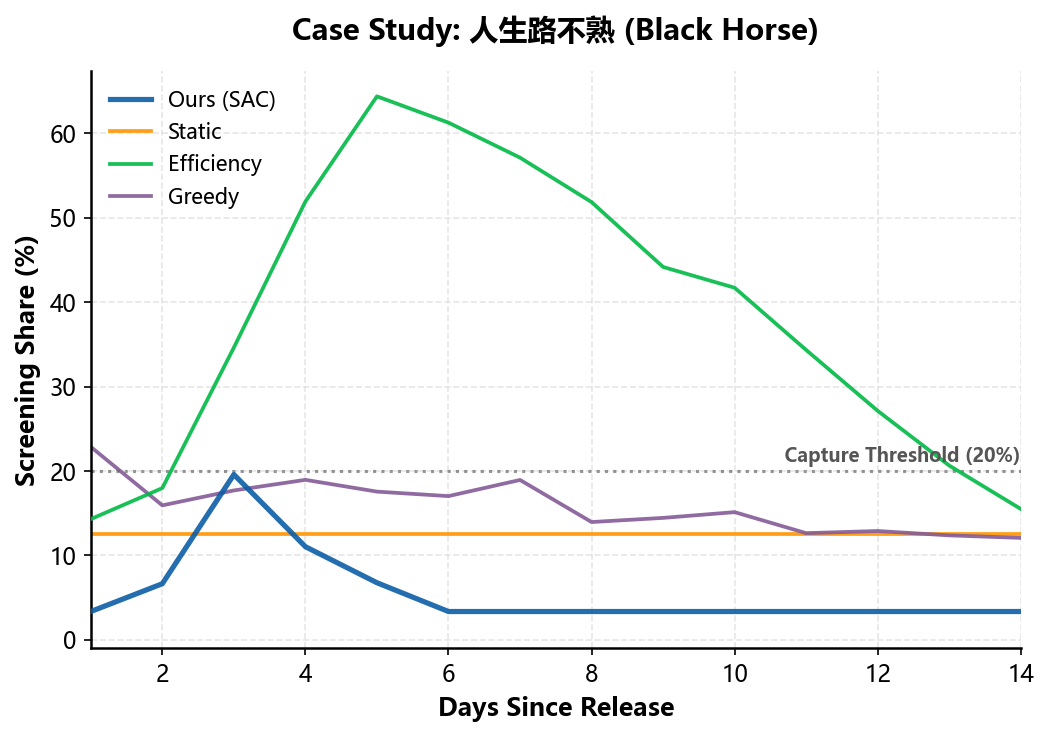

🎨 绘图: 《长安三万里》


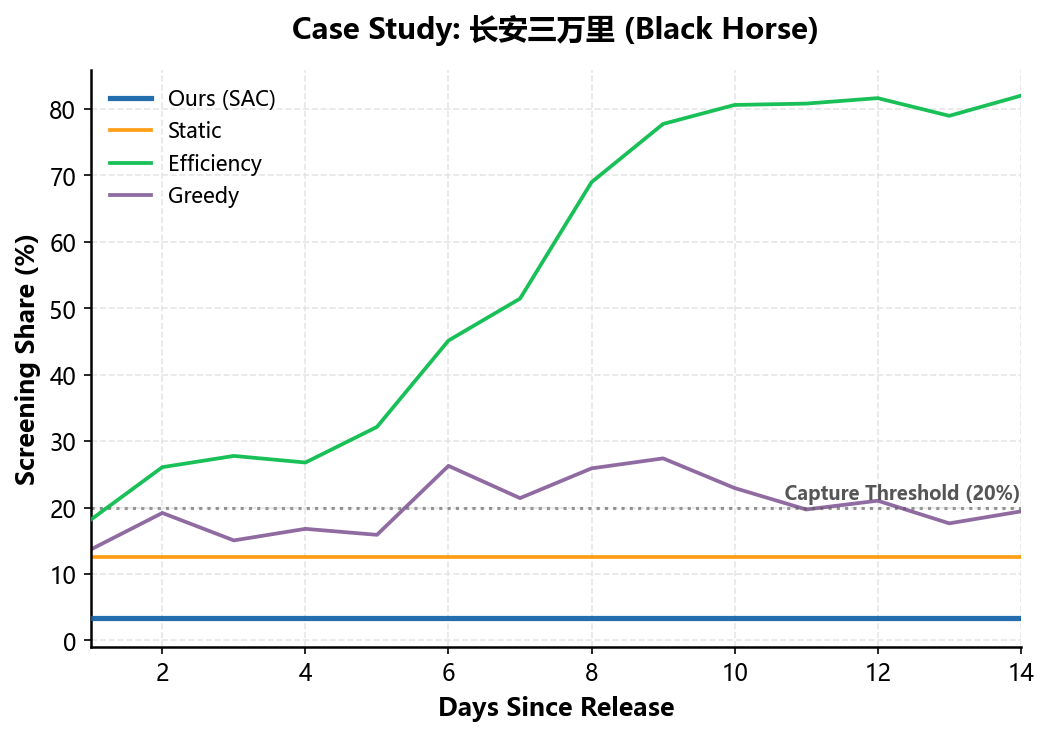

🎨 绘图: 《封神第一部：朝歌风云》


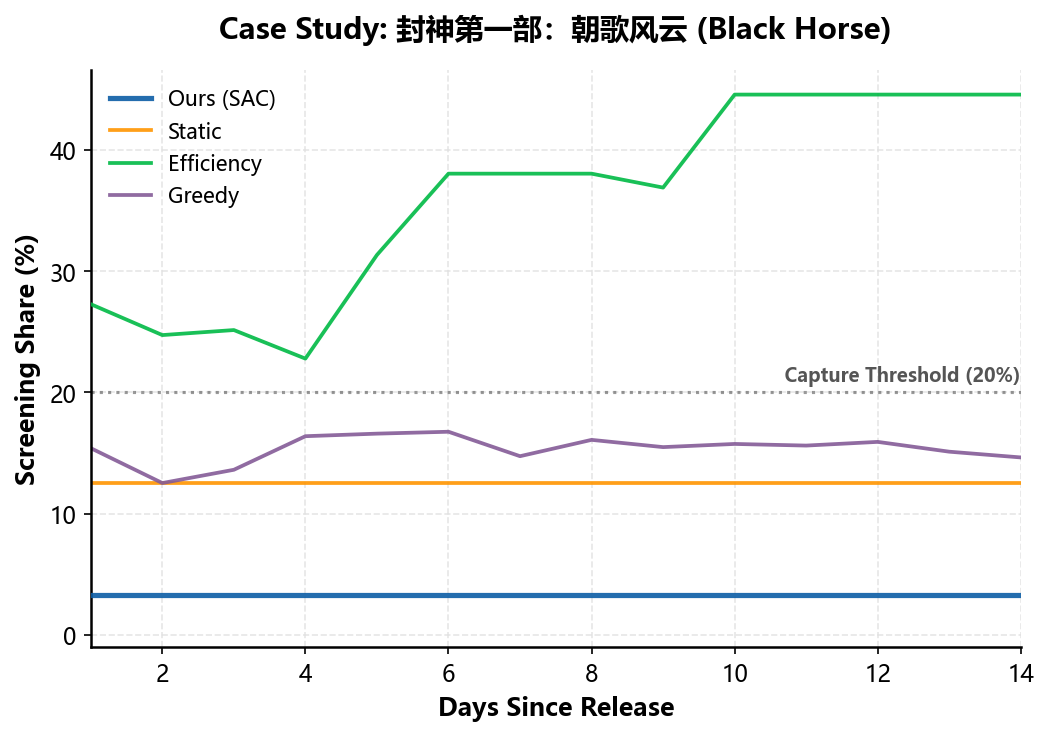

🎨 绘图: 《学爸》


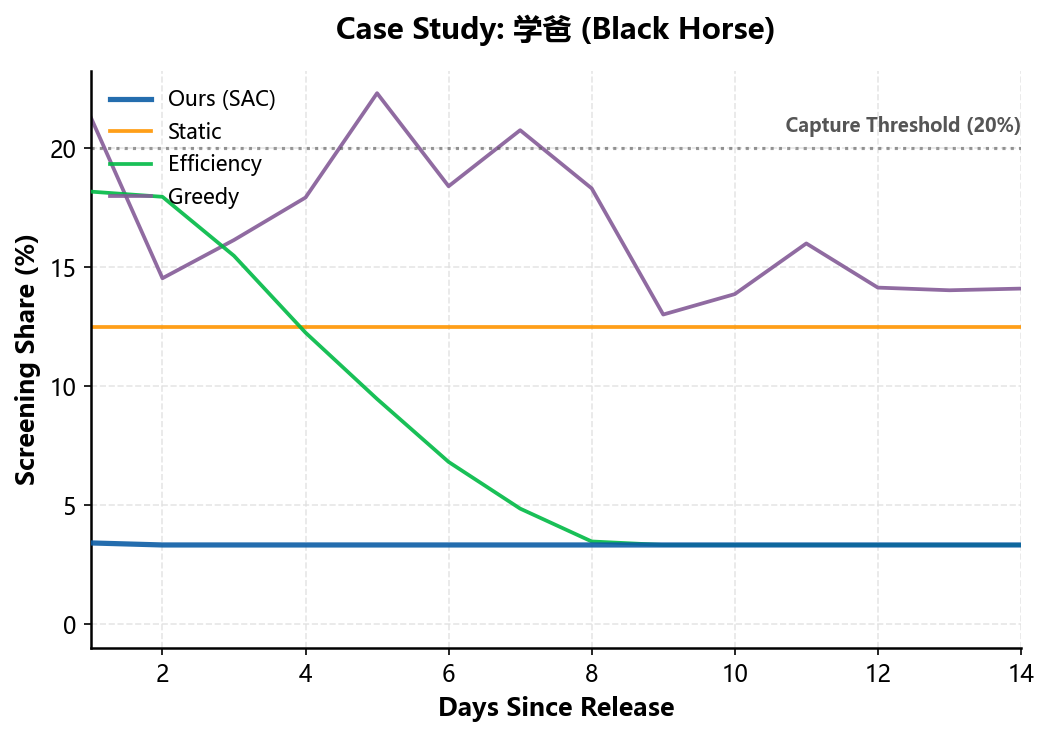

🎨 绘图: 《坚如磐石》


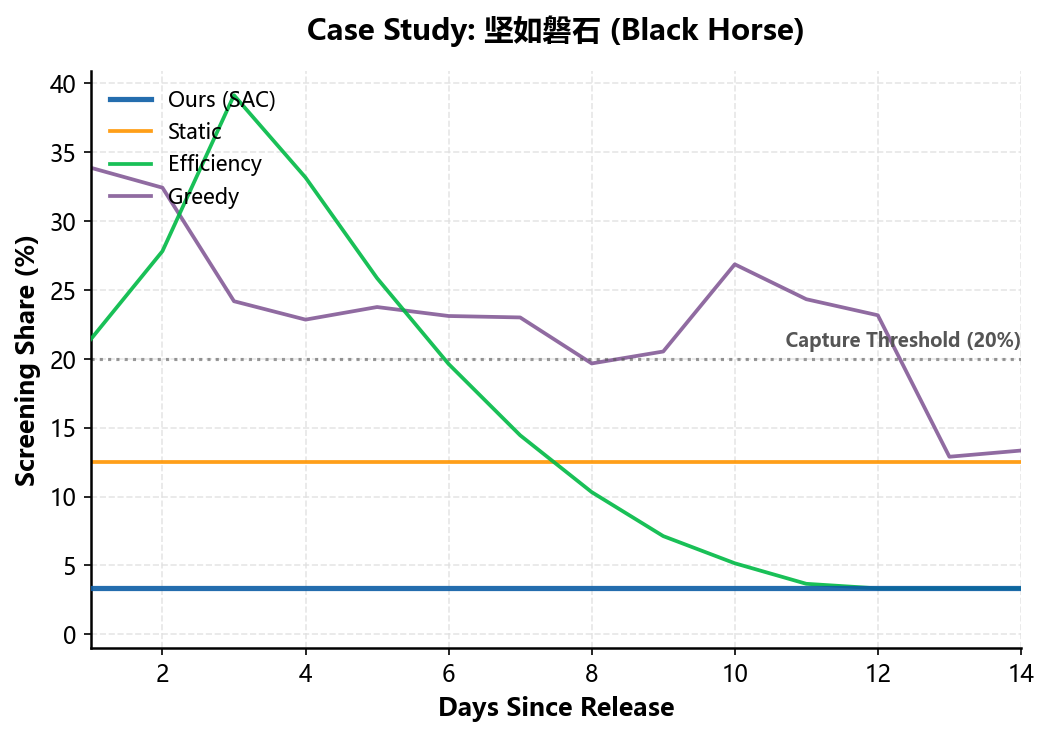

🎨 绘图: 《前任4：英年早婚》


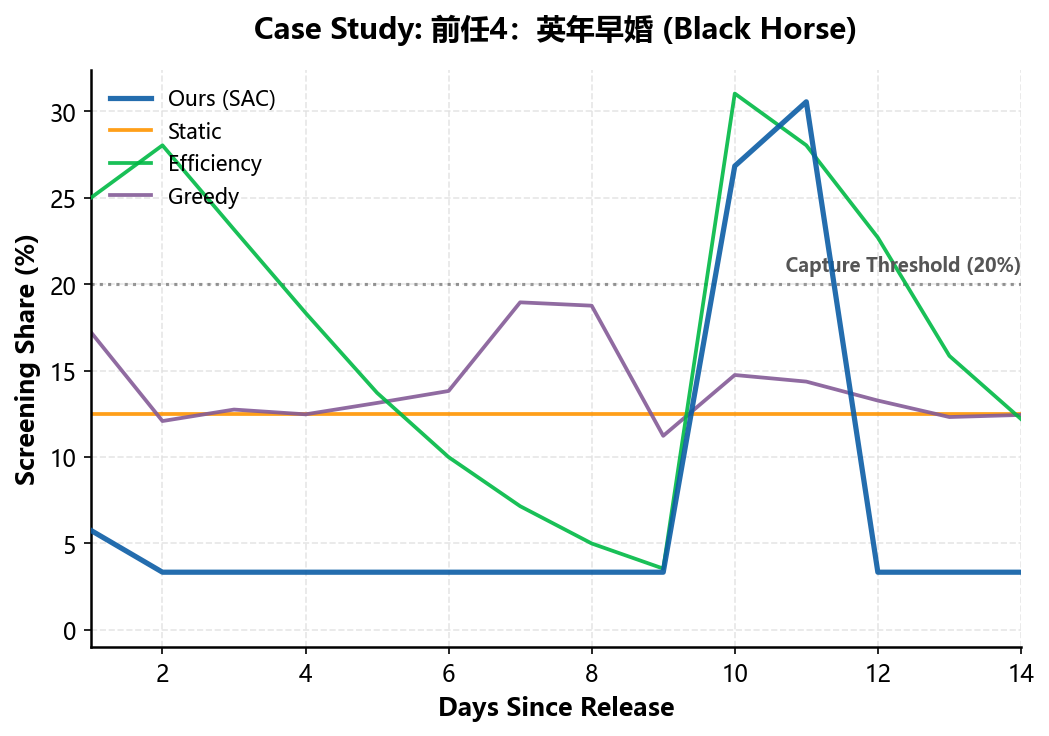

🎨 绘图: 《志愿军：雄兵出击》


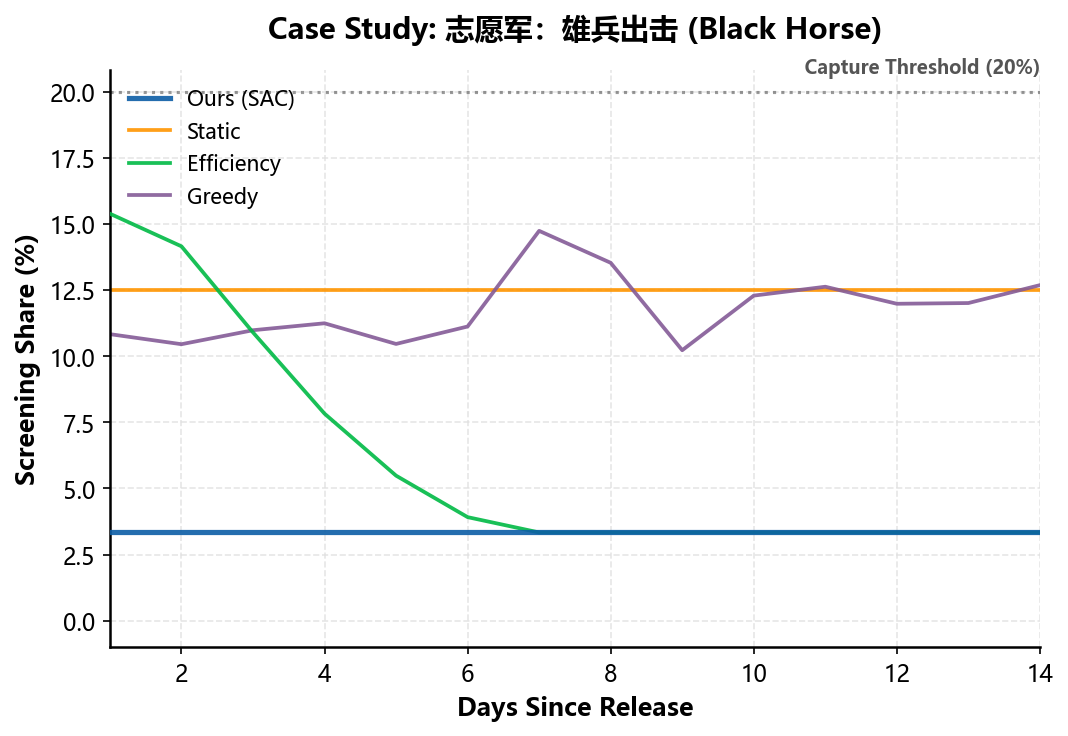

🎨 绘图: 《莫斯科行动》


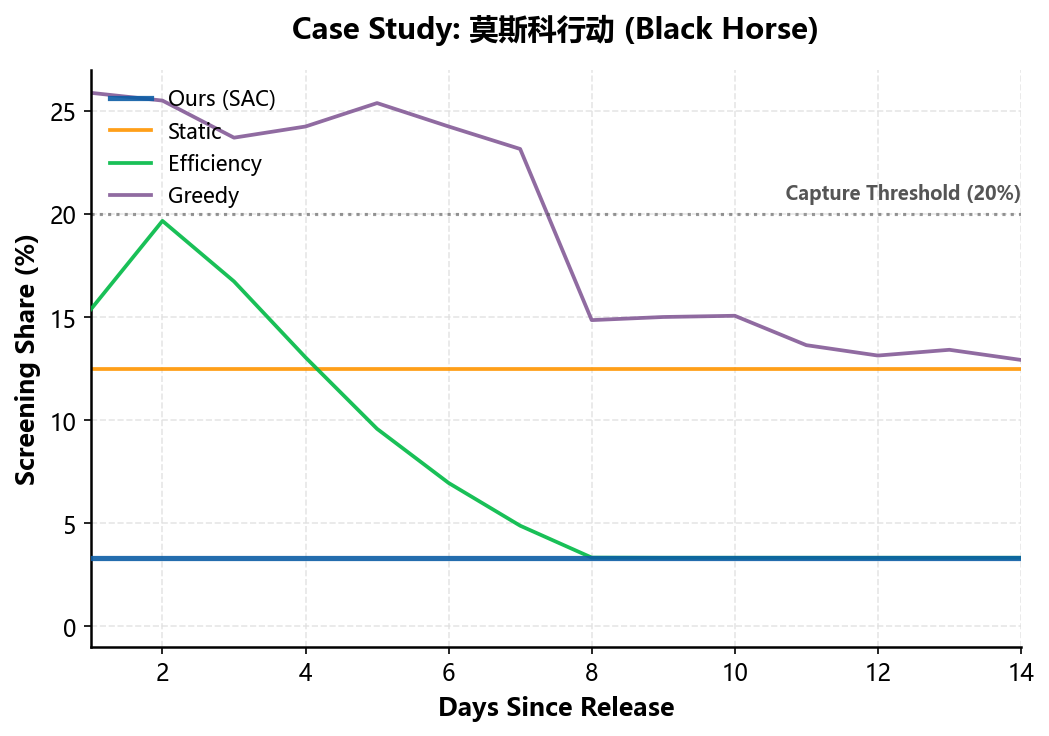

🎨 绘图: 《金手指》


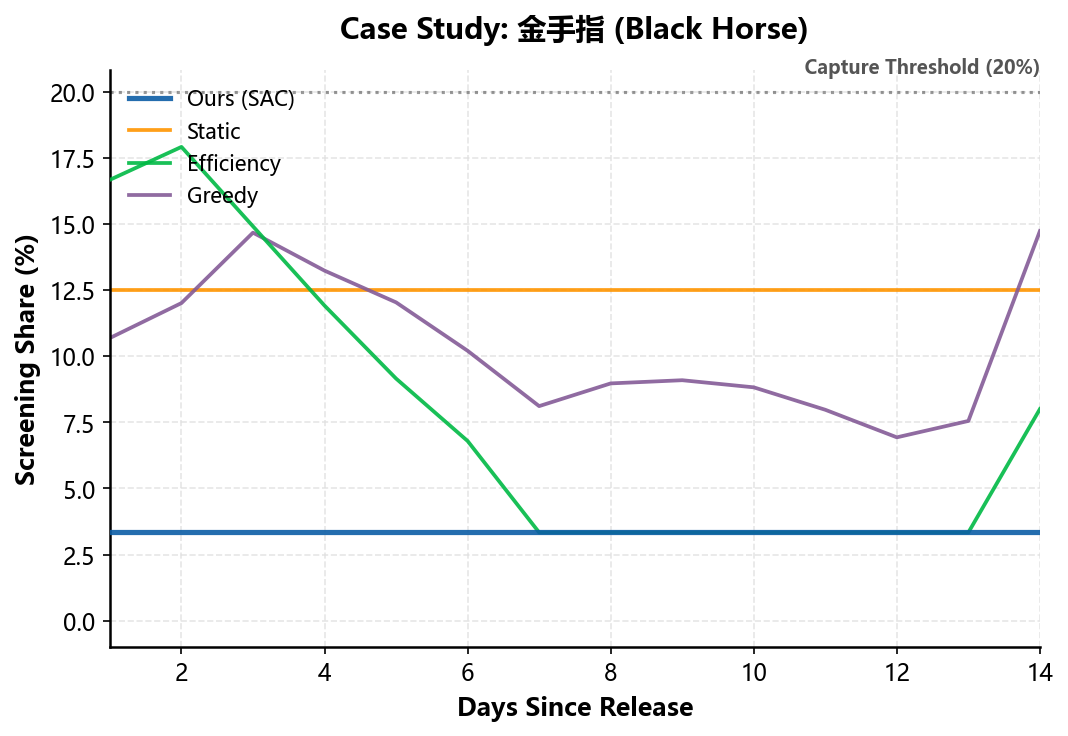

🎨 绘图: 《第二十条》


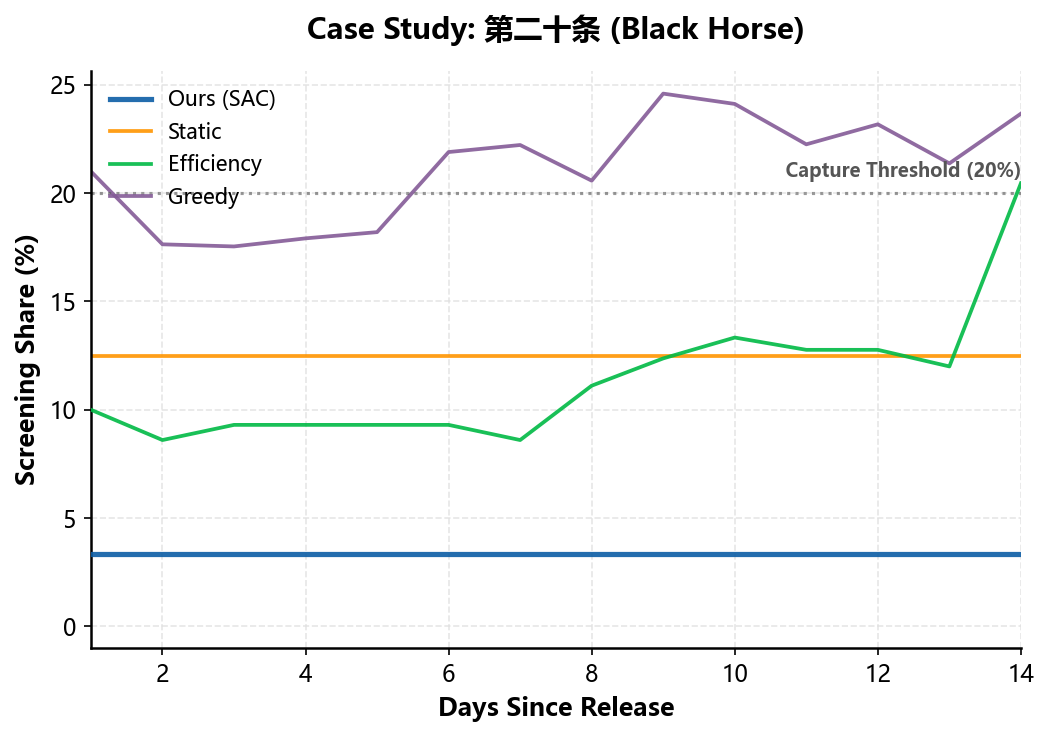

🎨 绘图: 《熊出没·逆转时空》


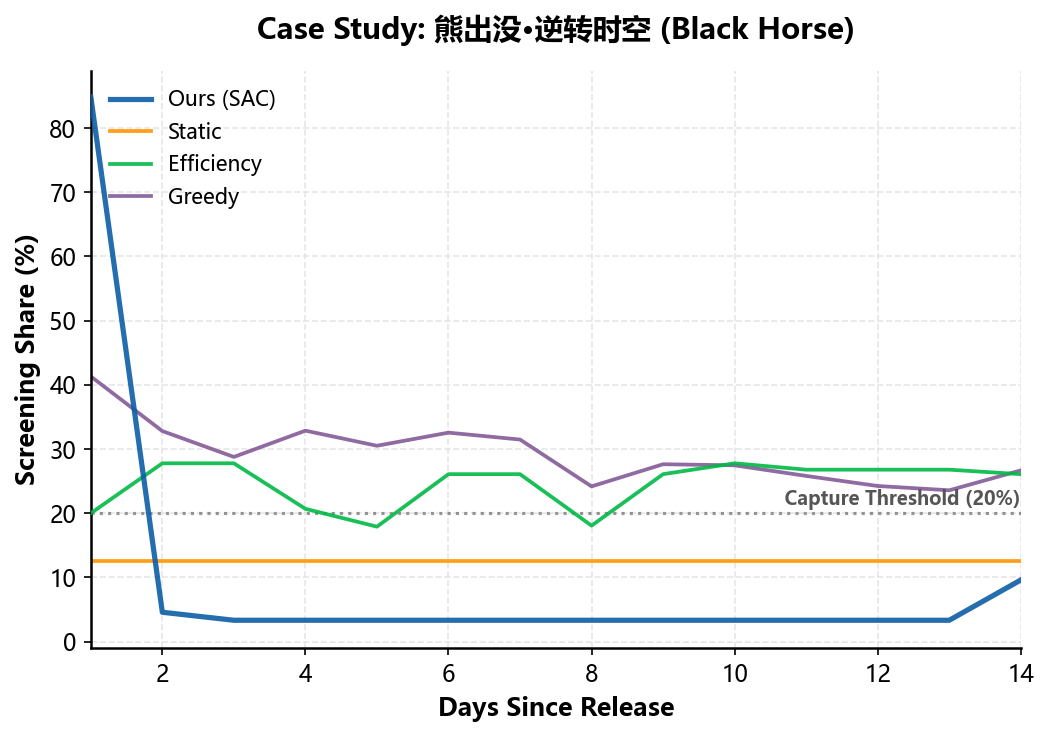

🎨 绘图: 《周处除三害》


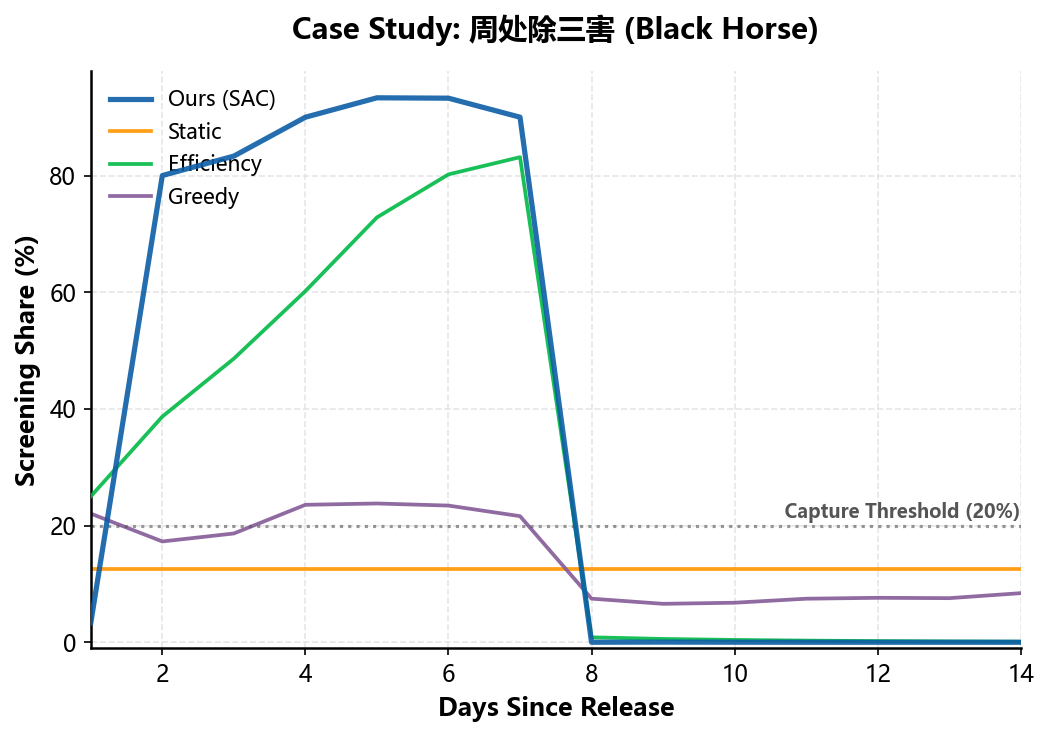

🎨 绘图: 《你想活出怎样的人生》


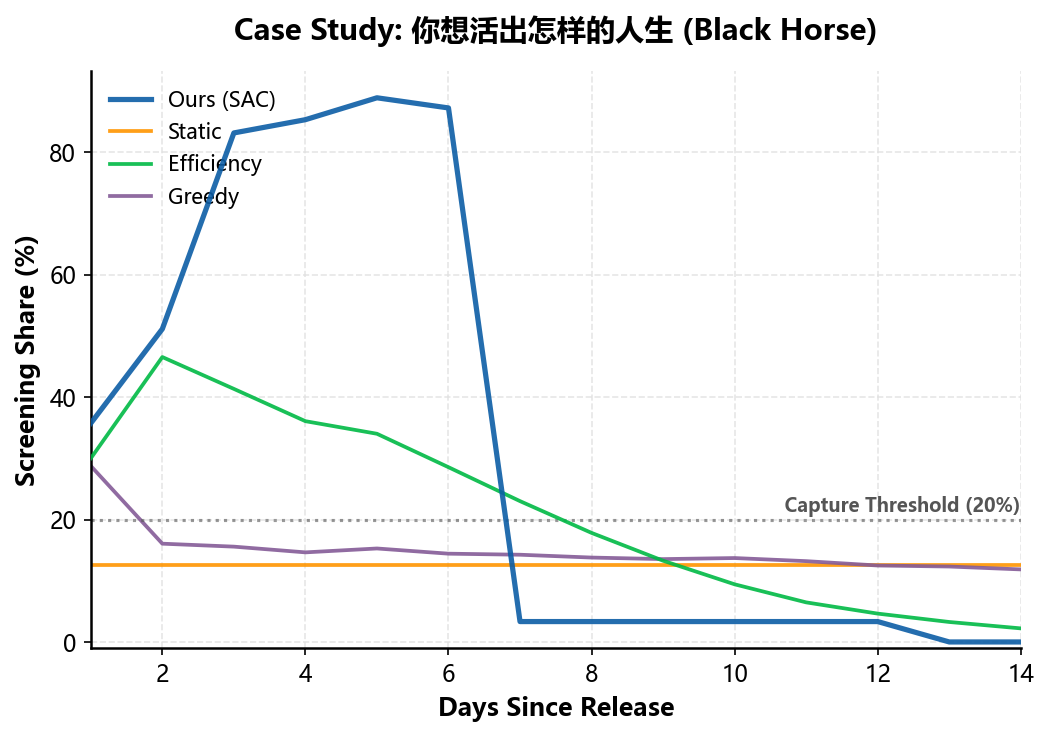

🎨 绘图: 《末路狂花钱》


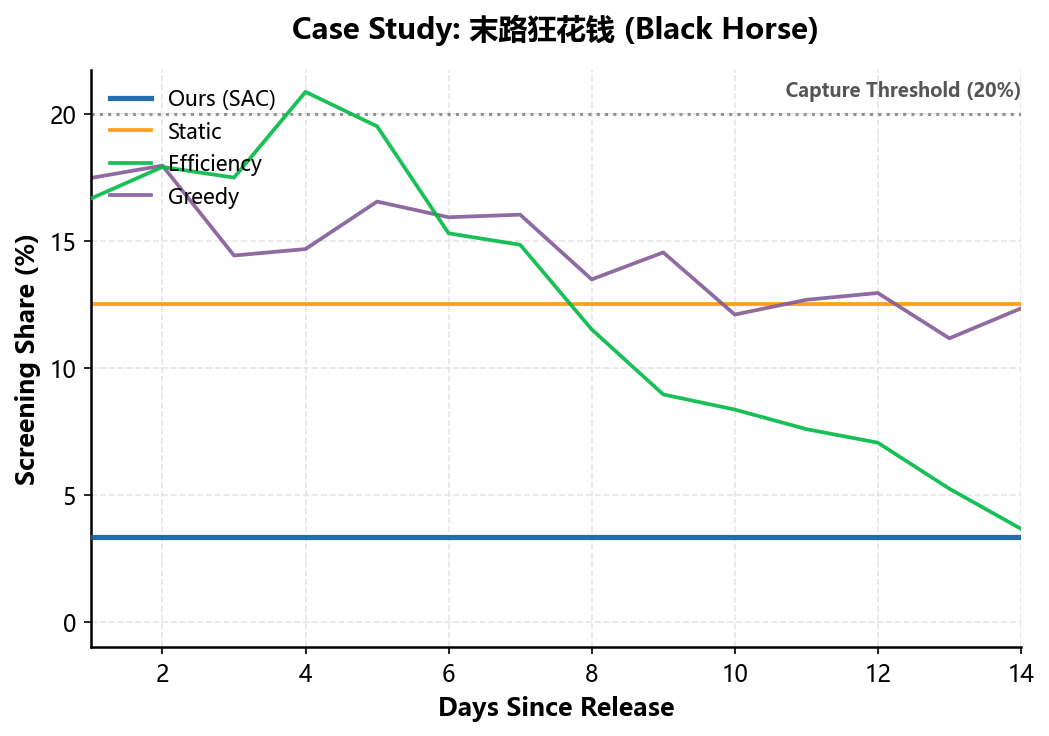

🎨 绘图: 《九龙城寨之围城》


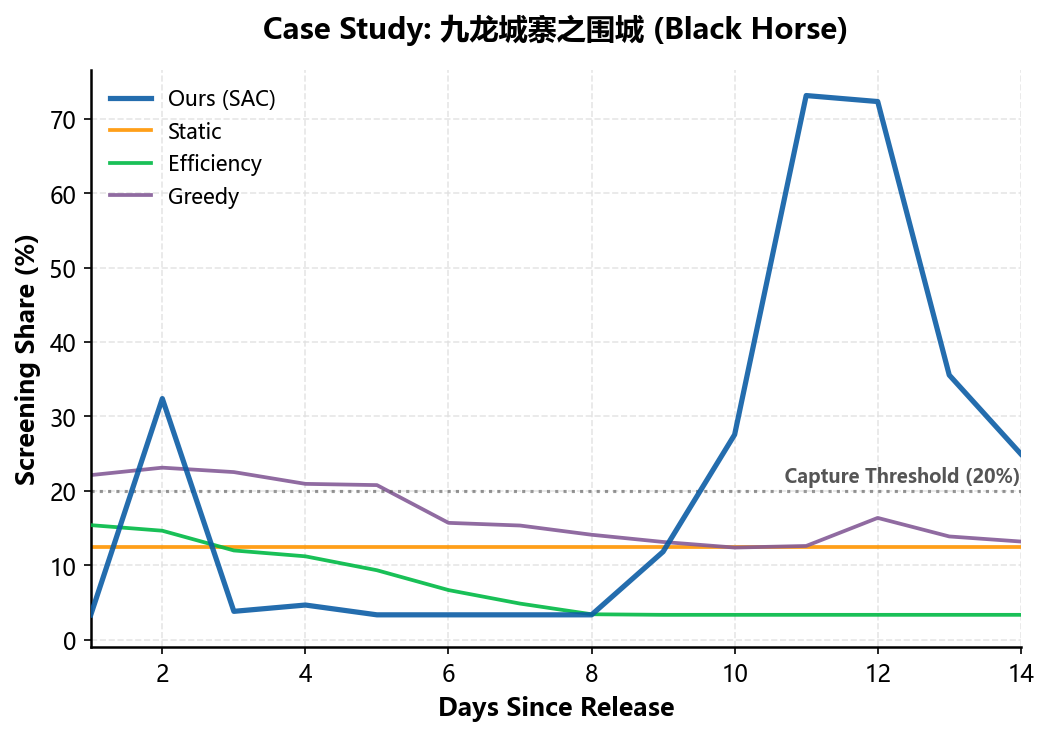

🎨 绘图: 《异形：夺命舰》


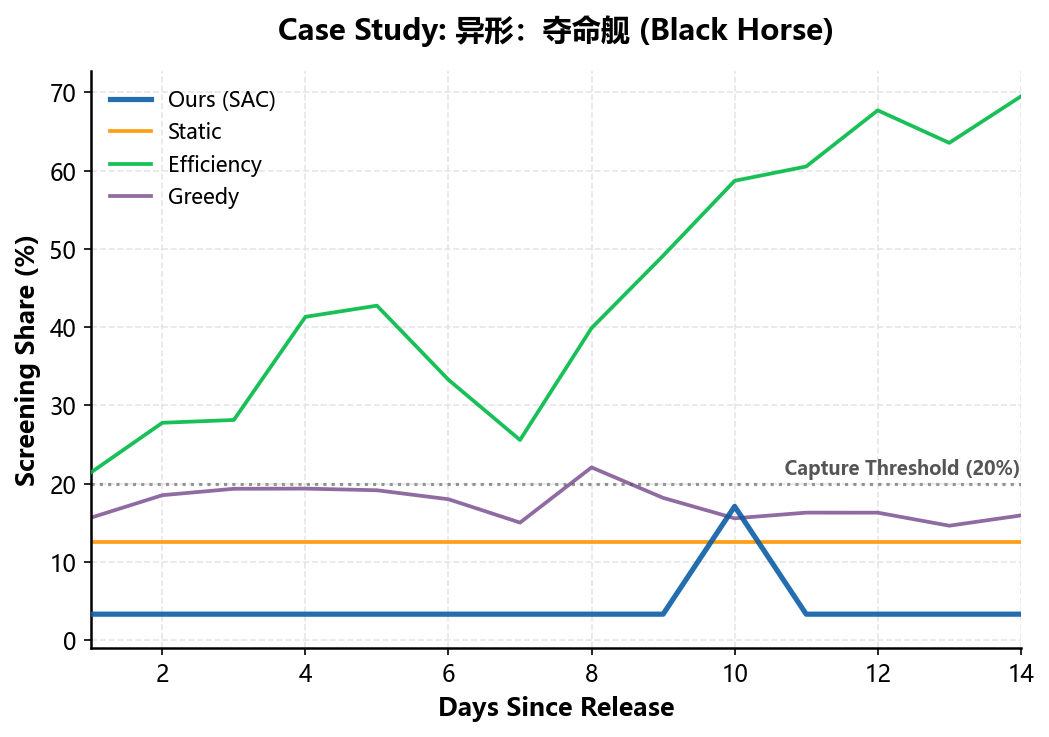

------------------------------------------------------------
✅ 所有高级感绘图已保存至:
   D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\black_horse_style


In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import platform  # 用于检测操作系统

# ==============================================================================
# 0. 科研绘图风格配置 (Science/Nature Style) - 【字体自动适配版】
# ==============================================================================
def set_pub_style():
    # 1. 自动检测系统并设置最佳中文字体
    sys_name = platform.system()
    
    # 关键修复：根据不同系统强制指定中文字体，解决 Glyph missing 报错
    if sys_name == "Windows":
        # Windows: 优先微软雅黑 (兼顾中文和英文数字显示)，其次黑体
        font_list = ['Microsoft YaHei', 'SimHei', 'Arial', 'sans-serif']
    elif sys_name == "Darwin":
        # Mac: 优先平黑，其次华文黑体
        font_list = ['PingFang SC', 'Heiti TC', 'Arial Unicode MS', 'Arial', 'sans-serif']
    else:
        # Linux: 优先文泉驿或Noto
        font_list = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'Arial', 'sans-serif']
        
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    
    # 2. 字号设置
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.labelsize'] = 13
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 11
    
    # 3. 线条与清晰度
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['figure.dpi'] = 150

# 定义一套高级感配色 (Science/Nature 常用色盘)
COLOR_PALETTE = {
    "SAC": "#0C5DA5",       # Science Blue (主色，深蓝)
    "Efficiency": "#00B945",# Muted Green (效率，绿色)
    "Static": "#FF9500",    # Warm Orange (静态，暖橙)
    "Greedy": "#845B97",    # Soft Purple (贪婪，柔紫)
    "Ref": "#555555"        # 灰色 (参考线)
}

# -----------------------------------------------------------------------------
# 1. 数据加载函数
# -----------------------------------------------------------------------------
def load_data(csv_path='logs/black_horse/black_horse_evaluation_results.csv'):
    """读取CSV并解析JSON列"""
    
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()
        print(f"⚠️ 检测到交互式环境，使用当前工作目录: {current_dir}")

    # 路径指向 logs/black_horse/
    possible_paths = [
        csv_path, 
        os.path.join(current_dir, csv_path),
        os.path.join(current_dir, 'logs', 'black_horse', 'black_horse_evaluation_results.csv'),
        os.path.join(os.path.dirname(current_dir), 'logs', 'black_horse', 'black_horse_evaluation_results.csv')
    ]
    
    found_path = None
    for p in possible_paths:
        if os.path.exists(p):
            found_path = p
            break
            
    if not found_path:
        print(f"❌ 错误：在以下路径均未找到数据文件:\n{possible_paths}")
        return pd.DataFrame()

    print(f"📂 正在读取数据: {found_path}")

    try:
        df = pd.read_csv(found_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(found_path, encoding='gbk')
        except Exception as e:
            print(f"❌ 读取失败: {e}")
            return pd.DataFrame()

    # 解析 JSON
    for col in ['daily_actions', 'daily_incomes']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    if 'case_study_index' in df.columns:
        df['case_study_index'] = pd.to_numeric(df['case_study_index'], errors='coerce')

    print(f"✅ 成功加载 {len(df)} 条记录。")
    return df

# -----------------------------------------------------------------------------
# 2. 主分析逻辑 (高级感绘图)
# -----------------------------------------------------------------------------
def analyze_and_plot_pretty():
    set_pub_style() # 应用样式
    df = load_data()
    if df.empty:
        print("⚠️ 数据为空，无法绘图。请先运行 main_black_horse.py 生成数据。")
        return

    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    # 输出目录设为 black_horse_style
    plots_dir = os.path.join(current_dir, 'plots', 'black_horse_style')
    os.makedirs(plots_dir, exist_ok=True)
    print(f"📂 图片将保存至: {plots_dir}")
    
    # ========================= [ 34部 黑马电影完整名单 ] =========================
    DARK_HORSE_MOVIES = [
        '流浪地球', '熊出没·原始时代', '新喜剧之王',
        '刺杀小说家', '人潮汹涌', '熊出没·狂野大陆',
        '这个杀手不太冷静', '熊出没·重返地球', '狙击手', '四海',
        '熊出没·伴我“熊芯”', '无名', '深海', '第二十条', '熊出没·逆转时空',
        '我和我的父辈', '坚如磐石', '前任4：英年早婚', '志愿军：雄兵出击', '莫斯科行动',
        '悬崖之上', '人生路不熟', '末路狂花钱', '九龙城寨之围城',
        '封神第一部：朝歌风云', '长安三万里', '学爸', '异形：夺命舰',
        '比悲伤更悲伤的故事', '我的姐姐', '扬名立万', '金手指', '周处除三害', '你想活出怎样的人生'
    ]
    # =========================================================================

    unique_cases = df[['start_date', 'case_study_movie']].drop_duplicates()
    print(f"\n🚀 开始绘制高级感图表，共 {len(unique_cases)} 个案例...")

    PLOT_DAYS = 14
    THRESHOLD = 0.20 # 20% 捕获线 (黑马标准)

    for _, row in unique_cases.iterrows():
        date = row['start_date']
        movie = row['case_study_movie']
        
        if movie not in DARK_HORSE_MOVIES: continue
        
        case_df = df[(df['start_date'] == date) & (df['case_study_movie'] == movie)].copy()
        if case_df.empty: continue
            
        print(f"🎨 绘图: 《{movie}》")

        # 创建画布
        fig, ax = plt.subplots(figsize=(8, 5))
        
        # 统一策略映射
        policy_map = {
            "RL (SAC)": {"label": "Ours (SAC)", "color": COLOR_PALETTE["SAC"], "z": 10},
            "效率启发式策略": {"label": "Efficiency", "color": COLOR_PALETTE["Efficiency"], "z": 3},
            "静态启发式策略": {"label": "Static", "color": COLOR_PALETTE["Static"], "z": 2},
            "贪婪启发式策略": {"label": "Greedy", "color": COLOR_PALETTE["Greedy"], "z": 2}
        }
        
        policies = case_df['policy'].unique()
        
        for policy_name in policies:
            run = case_df[case_df['policy'] == policy_name].iloc[0]
            idx = run['case_study_index']
            
            if pd.isna(idx): continue
            idx = int(idx)
            
            actions = run['daily_actions']
            
            y_values = []
            for day_act in actions[:PLOT_DAYS]:
                if len(day_act) > idx:
                    y_values.append(day_act[idx] * 100) 
                else:
                    y_values.append(0)
            
            x_values = range(1, len(y_values) + 1)
            
            # 获取样式
            style = policy_map.get(policy_name, {"label": policy_name, "color": "#333333", "z": 1})
            lw = 2.5 if "SAC" in policy_name else 1.8
            
            ax.plot(x_values, y_values, 
                    label=style["label"], 
                    color=style["color"], 
                    linewidth=lw, 
                    alpha=0.9, 
                    zorder=style["z"])

        # --- 高级感修饰 ---
        # 1. 去边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

        # 2. 捕获参考线
        ax.axhline(y=THRESHOLD*100, color=COLOR_PALETTE["Ref"], linestyle=':', linewidth=1.5, alpha=0.6)
        ax.text(PLOT_DAYS, THRESHOLD*100 + 0.5, ' Capture Threshold (20%)', 
                color=COLOR_PALETTE["Ref"], fontsize=9, va='bottom', ha='right', fontweight='bold')
        
        # 3. 标题与标签
        ax.set_title(f"Case Study: {movie} (Black Horse)", fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel("Days Since Release", fontsize=12, fontweight='bold')
        ax.set_ylabel("Screening Share (%)", fontsize=12, fontweight='bold')
        
        # 4. 坐标设置
        ax.set_xlim(1, PLOT_DAYS)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax.set_ylim(bottom=-1) # 稍微留点底空
        
        # 5. 网格
        ax.grid(True, linestyle='--', color='#E0E0E0', alpha=0.8, zorder=0)
        
        # 6. 图例
        ax.legend(frameon=False, loc='upper left', fontsize=10)
        
        # 保存
        safe_name = movie.replace('·', '').replace('：', '').replace(':', '').replace(' ', '')
        filename = f"{safe_name}_style.png"
        save_path = os.path.join(plots_dir, filename)
        
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
        
        # 显示图片
        plt.show()
        
        plt.close(fig) 

    print("-" * 60)
    print(f"✅ 所有高级感绘图已保存至:\n   {plots_dir}")

if __name__ == "__main__":
    analyze_and_plot_pretty()

📂 正在读取数据: D:\App\Pycharm\1120MovieSchedulingSimulation\logs\black_horse\black_horse_evaluation_results.csv

🚀 黑马电影排片捕获速度统计 (阈值: 20.0%)
   数值代表：第几天排片占比达到 20% (越小越好)
policy        RL (SAC)  效率启发式策略  贪婪启发式策略  静态启发式策略
九龙城寨之围城            2.0     38.0      1.0     45.0
人潮汹涌               6.0     22.0     45.0     45.0
人生路不熟             45.0      3.0      1.0     45.0
你想活出怎样的人生          1.0      1.0      1.0     45.0
刺杀小说家             45.0     45.0     45.0     45.0
前任4：英年早婚          10.0      1.0     30.0     45.0
周处除三害              2.0      1.0      1.0     45.0
四海                19.0     45.0     45.0     45.0
坚如磐石              45.0      1.0      1.0     45.0
学爸                45.0     16.0      1.0     45.0
封神第一部：朝歌风云        45.0      1.0     45.0     45.0
异形：夺命舰            37.0      1.0      8.0     45.0
志愿军：雄兵出击          32.0     21.0     22.0     45.0
悬崖之上               5.0     23.0      7.0     45.0
我和我的父辈            39.0      1.0      1.0     45.0
我的姐姐              45.0      3.0     

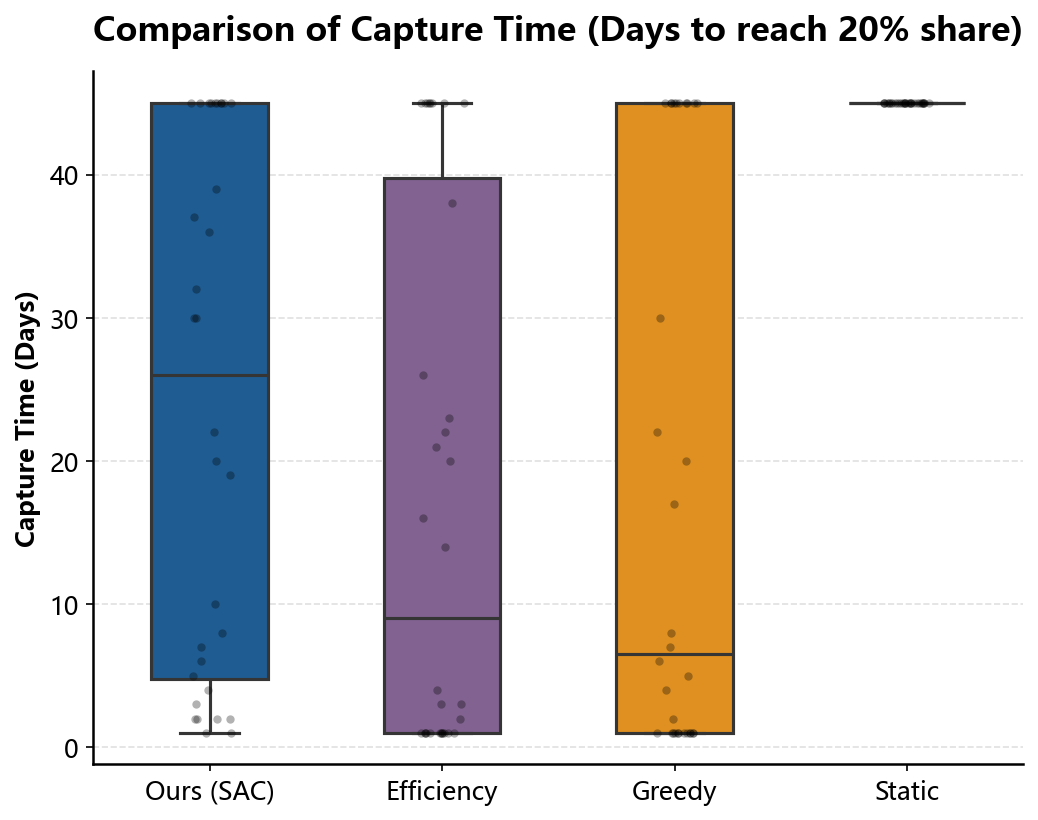

✅ 统计图表已保存至: D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\analysis_summary\capture_time_comparison.png


In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ==============================================================================
# 0. 科研绘图风格配置 (Science/Nature Style)
# ==============================================================================
def set_pub_style():
    sys_name = platform.system()
    if sys_name == "Windows":
        font_list = ['Microsoft YaHei', 'SimHei', 'Arial', 'sans-serif']
    elif sys_name == "Darwin":
        font_list = ['PingFang SC', 'Heiti TC', 'Arial Unicode MS', 'Arial', 'sans-serif']
    else:
        font_list = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'Arial', 'sans-serif']
        
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['figure.dpi'] = 150

COLOR_PALETTE = {
    "SAC": "#0C5DA5",       
    "Efficiency": "#00B945",
    "Static": "#FF9500",    
    "Greedy": "#845B97",    
}

# ==============================================================================
# 1. 数据加载
# ==============================================================================
def load_data(csv_path='logs/black_horse/black_horse_evaluation_results.csv'):
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    possible_paths = [
        csv_path, 
        os.path.join(current_dir, csv_path),
        os.path.join(current_dir, 'logs', 'black_horse', 'black_horse_evaluation_results.csv'),
        os.path.join(os.path.dirname(current_dir), 'logs', 'black_horse', 'black_horse_evaluation_results.csv')
    ]
    
    found_path = None
    for p in possible_paths:
        if os.path.exists(p):
            found_path = p
            break
            
    if not found_path:
        print(f"❌ 错误：未找到数据文件。请检查路径。")
        return pd.DataFrame()

    print(f"📂 正在读取数据: {found_path}")
    try:
        df = pd.read_csv(found_path, encoding='utf-8')
    except:
        df = pd.read_csv(found_path, encoding='gbk')

    for col in ['daily_actions', 'daily_incomes']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    if 'case_study_index' in df.columns:
        df['case_study_index'] = pd.to_numeric(df['case_study_index'], errors='coerce')

    return df

# ==============================================================================
# 2. 计算捕获时间
# ==============================================================================
def calculate_capture_days(daily_actions, movie_index, threshold=0.20, max_days=45):
    if pd.isna(movie_index): return np.nan
    movie_index = int(movie_index)
    
    for day, schedule in enumerate(daily_actions):
        if len(schedule) > movie_index:
            if schedule[movie_index] >= threshold:
                return day + 1
    return max_days

# ==============================================================================
# 3. 主分析与绘图
# ==============================================================================
def analyze_capture_time():
    set_pub_style()
    df = load_data()
    if df.empty: return

    DARK_HORSE_MOVIES = [
        '流浪地球', '熊出没·原始时代', '新喜剧之王',
        '刺杀小说家', '人潮汹涌', '熊出没·狂野大陆',
        '这个杀手不太冷静', '熊出没·重返地球', '狙击手', '四海',
        '熊出没·伴我“熊芯”', '无名', '深海', '第二十条', '熊出没·逆转时空',
        '我和我的父辈', '坚如磐石', '前任4：英年早婚', '志愿军：雄兵出击', '莫斯科行动',
        '悬崖之上', '人生路不熟', '末路狂花钱', '九龙城寨之围城',
        '封神第一部：朝歌风云', '长安三万里', '学爸', '异形：夺命舰',
        '比悲伤更悲伤的故事', '我的姐姐', '扬名立万', '金手指', '周处除三害', '你想活出怎样的人生'
    ]
    
    df = df[df['case_study_movie'].isin(DARK_HORSE_MOVIES)].copy()
    
    THRESHOLD = 0.20
    df['capture_day'] = df.apply(
        lambda r: calculate_capture_days(r['daily_actions'], r['case_study_index'], THRESHOLD), 
        axis=1
    )
    
    # 生成汇总表格
    summary_table = df.pivot_table(
        index='case_study_movie', 
        columns='policy', 
        values='capture_day',
        aggfunc='mean'
    )
    
    policy_order = ["RL (SAC)", "效率启发式策略", "贪婪启发式策略", "静态启发式策略"]
    available_cols = [c for c in policy_order if c in summary_table.columns]
    summary_table = summary_table[available_cols]
    
    mean_row = summary_table.mean().to_frame().T
    mean_row.index = ['Average (平均)']
    final_table = pd.concat([summary_table, mean_row])
    
    # --- 输出优化：只保留一位小数，对齐显示 ---
    print("\n" + "="*80)
    print(f"🚀 黑马电影排片捕获速度统计 (阈值: {THRESHOLD*100}%)")
    print("   数值代表：第几天排片占比达到 20% (越小越好)")
    print("="*80)
    
    # 使用 round(1) 解决小数位过多的问题
    # 并尝试用 to_string 对齐
    print(final_table.round(1).to_string()) 
    print("="*80 + "\n")

    # 绘图逻辑
    plot_df = df[df['policy'].isin(policy_order)].copy()
    name_map = {
        "RL (SAC)": "Ours (SAC)",
        "效率启发式策略": "Efficiency",
        "静态启发式策略": "Static",
        "贪婪启发式策略": "Greedy"
    }
    plot_df['Policy_En'] = plot_df['policy'].map(name_map)
    order_en = [name_map[p] for p in policy_order if p in name_map]
    
    colors = []
    for p in policy_order:
        if p in name_map:
            key = "SAC" if "SAC" in p else ("Efficiency" if "效率" in p else ("Static" if "静态" in p else "Greedy"))
            colors.append(COLOR_PALETTE[key])

    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 【修复】 增加 hue 和 legend=False 以解决 Future Warning 并确保正常绘图
    sns.boxplot(
        data=plot_df, 
        x='Policy_En', 
        y='capture_day',
        hue='Policy_En', # 显式指定 hue
        order=order_en,
        palette=colors,
        width=0.5,
        linewidth=1.5,
        fliersize=3,
        legend=False,    # 关闭图例
        ax=ax
    )
    
    sns.stripplot(
        data=plot_df,
        x='Policy_En',
        y='capture_day',
        order=order_en,
        color='black',
        alpha=0.3,
        size=4,
        jitter=True,
        ax=ax
    )

    ax.set_title('Comparison of Capture Time (Days to reach 20% share)', fontweight='bold', pad=15)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('Capture Time (Days)', fontsize=12, fontweight='bold')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.7)
    ax.set_axisbelow(True)

    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()
        
    save_dir = os.path.join(current_dir, 'plots', 'analysis_summary')
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, 'capture_time_comparison.png')
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 统计图表已保存至: {save_path}")

if __name__ == "__main__":
    analyze_capture_time()